AI-Generated Notebook for Dandiset 001176 with Human Supervision
===

**Important Note:** This notebook was AI-generated with human supervision and has not been fully verified. Use caution when interpreting the code or results.

This notebook provides an introduction to Dandiset 001176, titled "Cortical acetylcholine dynamics are predicted by cholinergic axon activity and behavior state." It demonstrates how to access and visualize sample data from NWB files within the Dandiset.

**Dandiset Summary:**

*   **Name:** Cortical acetylcholine dynamics are predicted by cholinergic axon activity and behavior state
*   **Description:** This dataset includes simultaneous in vivo imaging data of acetylcholine (ACh) sensors and GCaMP-expressing axons in the cortex during spontaneous changes in behavioral states in awake animals. It features detailed recordings of ACh activity, axon activity, and pupil size, providing valuable insights into the spatiotemporal properties of cortical ACh release and its correlation with axonal activity.
*   **Keywords:** acetylcholine, brain states, two-photon-imaging, neuromodulator, Axon imaging
*   **Number of Subjects:** 29
*   **Number of Files:** 132

**To run this notebook, you will need to install the following packages:**

```bash
pip install lindi pynwb matplotlib seaborn
```


In [1]:
# Use the DANDI API to list all assets in the Dandiset
## Note: No need to pip install these packages, the user should already have them

from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001176")
assets = list(dandiset.get_assets())
print(f"Number of assets in the dandiset: {len(assets)}")

Number of assets in the dandiset: 132


The code cell above connected to the DANDI archive and printed out the assets in the Dandiset.

Now, let's select an NWB file from the Dandiset to explore. We will use the file:
`sub-16/sub-16_ses-16-1-2-Ach-M1_behavior+ophys.nwb`
This file contains behavior and ophys data.

In [2]:
# Load the NWB file
import pynwb
import lindi

# Load https://api.dandiarchive.org/api/assets/4550467f-b94d-406b-8e30-24dd6d4941c1/download/
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001176/assets/4550467f-b94d-406b-8e30-24dd6d4941c1/nwb.lindi.json") # hardcoded url
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print some information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

Session description: Two-Photon in-vivo imaging
Identifier: JR_BCM_16_1_2_Ach_M1
Session start time: 2024-04-29 17:31:15-05:51


The code cell above loaded the NWB file and printed some basic information about it. Now, let's explore some of the data in the file.

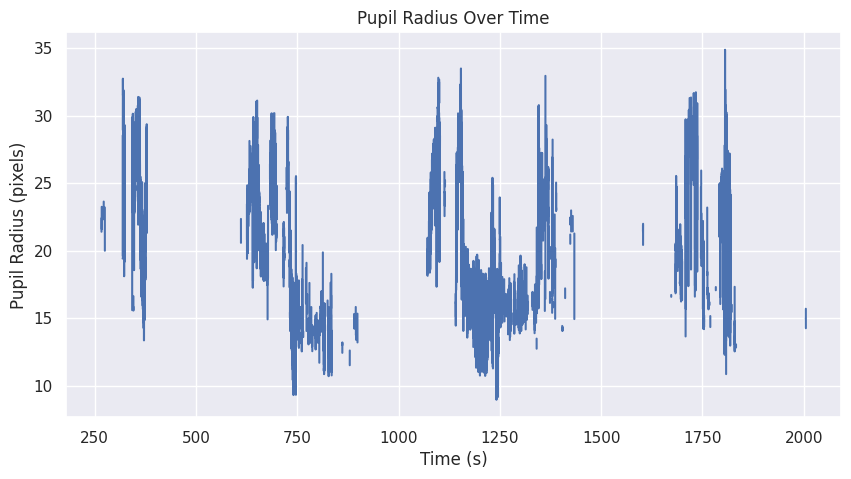

In [3]:
# Explore pupil_raw_radius data and create a plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Get pupil_raw_radius data and timestamps
pupil_raw_radius = nwb.acquisition["PupilTracking"]["pupil_raw_radius"]
radius_data = pupil_raw_radius.data[:]
radius_timestamps = pupil_raw_radius.timestamps[:]

# Plot the pupil radius over time
plt.figure(figsize=(10, 5))
plt.plot(radius_timestamps, radius_data)
plt.xlabel("Time (s)")
plt.ylabel("Pupil Radius (pixels)")
plt.title("Pupil Radius Over Time")
plt.show()

The plot above shows the pupil radius over time. We can see that the pupil radius fluctuates significantly over time.

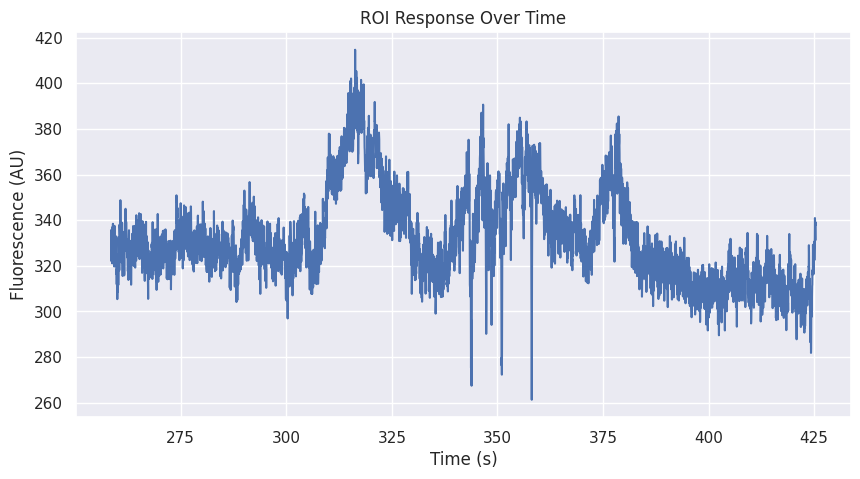

In [4]:
# Explore RoiResponseSeries1 data and create a plot
# Get RoiResponseSeries1 data and timestamps
ophys = nwb.processing["ophys"]
Fluorescence = ophys["Fluorescence"]
RoiResponseSeries1 = Fluorescence["RoiResponseSeries1"]
roi_data = RoiResponseSeries1.data[:5000, 0]  # Load a subset of the data
roi_timestamps = RoiResponseSeries1.timestamps[:5000] # Load a subset of the timestamps

# Plot the ROI response over time
plt.figure(figsize=(10, 5))
plt.plot(roi_timestamps, roi_data)
plt.xlabel("Time (s)")
plt.ylabel("Fluorescence (AU)")
plt.title("ROI Response Over Time")
plt.show()

The plot above shows the ROI response over time. We can see that the fluorescence signal fluctuates significantly over time.

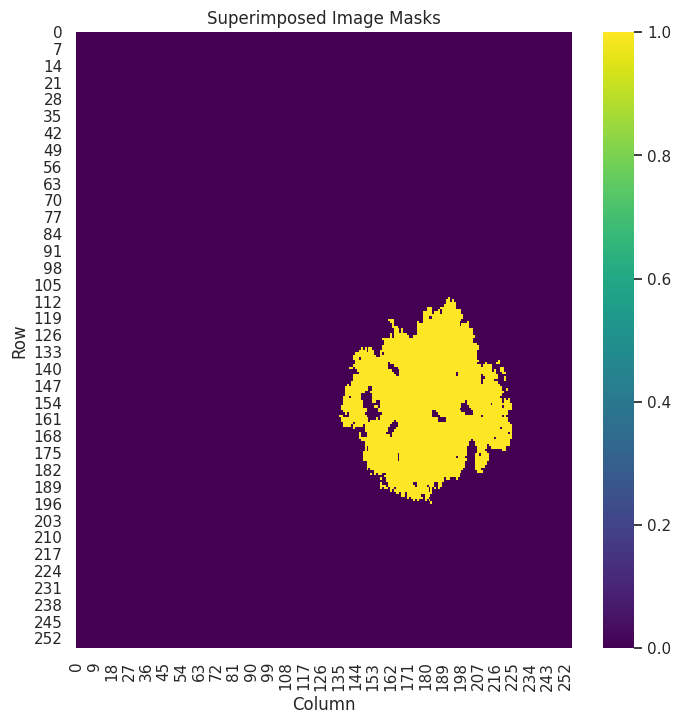

In [5]:
# Explore PlaneSegmentation1 and create a plot of the image masks
import numpy as np

# Get image_mask data from PlaneSegmentation1
ophys = nwb.processing["ophys"]
ImageSegmentation = ophys["ImageSegmentation"]
PlaneSegmentation1 = ImageSegmentation["PlaneSegmentation1"]
image_mask_data = PlaneSegmentation1["image_mask"].data[:]

# Superimpose all image masks using np.max
superimposed_mask = np.max(image_mask_data, axis=0)

# Plot the superimposed image mask
plt.figure(figsize=(8, 8))
sns.heatmap(superimposed_mask, cmap="viridis")
plt.title("Superimposed Image Masks")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()